In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()
x_data = digits.data
y_data = digits.target

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)

mlp = MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
x_data.shape

(1797, 64)

In [7]:
#数据中心化
def zeroMean(dataMat):
    meanVal = np.mean(dataMat,axis = 0)
    newData = dataMat - meanVal
    return newData,meanVal
def pca(dataMat,top):
    newData,meanVal = zeroMean(dataMat)
    #np.cov求协方差矩阵，参数rowvar=0说明数据一行代表一个样本
    covMat = np.cov(newData,rowvar=0)
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    eigValIndice = np.argsort(eigVals)
    n_eigValIndice = eigValIndice[-1:-(top+1):-1]
    n_eigVect = eigVects[:,n_eigValIndice]
    lowDDataMat = newData*n_eigVect
    reconMat = (lowDDataMat*n_eigVect.T) + meanVal
    return lowDDataMat,reconMat

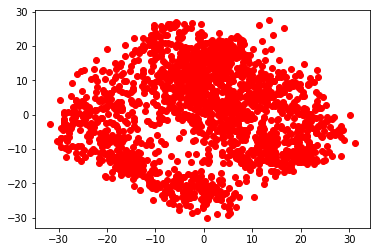

In [12]:
lowDDataMat,reconMat = pca(x_data,2)

x=np.array(lowDDataMat)[:,0]
y=np.array(lowDDataMat)[:,1]
plt.scatter(x,y,c='r')
plt.show()

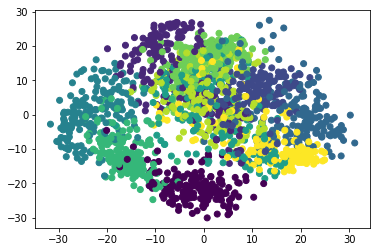

In [14]:
#lowDDataMat,reconMat = pca(x_data,2)

x=np.array(lowDDataMat)[:,0]
y=np.array(lowDDataMat)[:,1]
plt.scatter(x,y,c=y_data)
plt.show()

In [15]:
lowDDataMat,reconMat = pca(x_data,3)

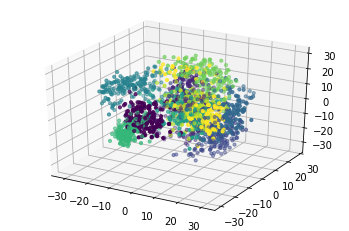

In [18]:
from mpl_toolkits.mplot3d import Axes3D
x = np.array(lowDDataMat)[:,0]
y = np.array(lowDDataMat)[:,1]
z = np.array(lowDDataMat)[:,2]

ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=y_data,s=10)
plt.show()